In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

In [2]:
os.chdir('D:\\test\project')

In [3]:
file = 'shipping_data.xlsx'

In [4]:
reader_object = csv.reader(file, delimiter = ",")

In [5]:
reader_object

In [6]:
df = pd.read_csv('shipping_data.csv', sep=',')

In [7]:
set(df['shipment date'])

{'2023-03-12',
 '2023-03-13',
 '2023-03-14',
 '2023-03-15',
 '2023-03-16',
 '2023-03-17',
 '2023-03-18',
 '2023-03-19',
 '2023-03-20',
 '2023-03-21',
 '2023-03-22',
 '2023-03-23',
 '2023-03-24',
 '2023-03-25',
 '2023-03-26',
 '2023-03-27',
 '2023-03-28',
 nan}

In [8]:
df.shape


(263821, 8)

In [9]:
df


,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore)
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea)
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China)
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China)
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China)
...,...,...,...,...,...,...,...,...
263816,Canister,23.58,3.80,0.38,0.37,0.28,2023-03-13,Port of Busan (South Korea)
263817,Plant,15.98,1.20,0.42,0.29,0.34,2023-03-15,Port of Tokyo (Japan)
263818,Pallete of Dog Food,223.05,477.58,1.00,0.92,1.48,2023-03-19,Port of Tokyo (Japan)
263819,Coffee Maker,169.09,2.52,0.26,0.20,0.29,2023-03-20,Port of Shanghai (China)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263821 entries, 0 to 263820
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              263821 non-null  object 
 1   price ($)         263821 non-null  float64
 2   weight (kg)       263808 non-null  float64
 3   length (m)        263637 non-null  float64
 4   width (m)         263821 non-null  float64
 5   height (m)        263821 non-null  float64
 6   shipment date     261183 non-null  object 
 7   destination port  263795 non-null  object 
dtypes: float64(5), object(3)
memory usage: 16.1+ MB


In [11]:
df.columns

Index(['name', 'price ($)', 'weight (kg)', 'length (m)', 'width (m)',
       'height (m)', 'shipment date', 'destination port'],
      dtype='object')

In [12]:
df.isnull().sum()

name                   0
price ($)              0
weight (kg)           13
length (m)           184
width (m)              0
height (m)             0
shipment date       2638
destination port      26
dtype: int64

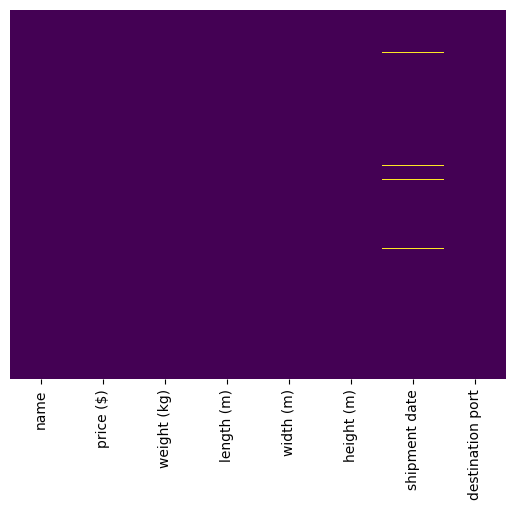

In [13]:
sns_heatmap = sns.heatmap(df.sample(5000).isnull(), 
                          yticklabels=False, 
                          cbar=False, 
                          cmap='viridis')

In [14]:
df.loc[df['weight (kg)'].isnull() == True]

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port
6084,Portable Charger,38.84,NaN,0.13,0.07,0.03,2023-03-17,Port of Tianjin (China)
27873,Microphone,243.44,NaN,0.06,0.06,0.20,2023-03-27,Port of Tianjin (China)
62712,Pallete of Shoes,445.97,NaN,1.00,0.95,1.24,2023-03-16,Port of Busan (South Korea)
106435,Bed,451.19,NaN,2.23,1.88,1.03,2023-03-13,Port of Tokyo (Japan)
114334,Pallete of Tea,336.94,NaN,1.13,0.95,1.26,2023-03-26,Port of Tokyo (Japan)
134316,Computer,758.39,NaN,0.45,0.49,0.15,2023-03-12,Port of Tianjin (China)
143705,Stone Slabs,115.67,NaN,0.76,0.67,0.07,2023-03-13,Port of Singapore (Singapore)
146637,Dining Table,210.75,NaN,1.50,1.49,0.76,2023-03-19,Port of Tianjin (China)
162937,Soap Dispenser,13.61,NaN,0.13,0.17,0.28,2023-03-12,Port of Singapore (Singapore)
174575,Hoe,26.82,NaN,0.93,0.41,0.41,2023-03-26,Port of Busan (South Korea)


In [15]:
df['volume']= df['length (m)']*df['width (m)']*df['height (m)']
#добавляем обьем

In [16]:
df2 = df.loc[df['name'] == 'Portable Charger']
#собираем все зарядки

In [17]:
k2=df2['weight (kg)']/df2['volume']
k2.mean()
#находим коэффициент веса на единицу обьема

1744.265013559736

In [18]:
#заполняем значение веса обьемом умноженным на коэффициент категории
df.loc[df['name'] == 'Portable Charger', 'weight (kg)'] = df.loc[df['name'] == 'Portable Charger', 'weight (kg)'].fillna(k2.mean() * df['volume'])

In [19]:
df.loc[df['weight (kg)'].isnull() == True]

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume
27873,Microphone,243.44,NaN,0.06,0.06,0.20,2023-03-27,Port of Tianjin (China),0.000720
62712,Pallete of Shoes,445.97,NaN,1.00,0.95,1.24,2023-03-16,Port of Busan (South Korea),1.178000
106435,Bed,451.19,NaN,2.23,1.88,1.03,2023-03-13,Port of Tokyo (Japan),4.318172
114334,Pallete of Tea,336.94,NaN,1.13,0.95,1.26,2023-03-26,Port of Tokyo (Japan),1.352610
134316,Computer,758.39,NaN,0.45,0.49,0.15,2023-03-12,Port of Tianjin (China),0.033075
143705,Stone Slabs,115.67,NaN,0.76,0.67,0.07,2023-03-13,Port of Singapore (Singapore),0.035644
146637,Dining Table,210.75,NaN,1.50,1.49,0.76,2023-03-19,Port of Tianjin (China),1.698600
162937,Soap Dispenser,13.61,NaN,0.13,0.17,0.28,2023-03-12,Port of Singapore (Singapore),0.006188
174575,Hoe,26.82,NaN,0.93,0.41,0.41,2023-03-26,Port of Busan (South Korea),0.156333
229151,Hair Dryer,31.90,NaN,0.21,0.10,0.16,2023-03-22,Port of Busan (South Korea),0.003360


In [20]:
k3 = df.loc[df['name'] == 'Microphone', 'weight (kg)'] / df.loc[df['name'] == 'Microphone', 'volume']
k3.mean()

264.7427259669348

In [21]:
df.loc[df['name'] == 'Microphone', 'weight (kg)'] = df.loc[df['name'] == 'Microphone', 'weight (kg)'].fillna(k3.mean() * df['volume'])

In [22]:
k4 = df.loc[df['name'] == 'Pallete of Shoes', 'weight (kg)'] / df.loc[df['name'] == 'Pallete of Shoes', 'volume']
k4.mean()

2864.102756992252

In [23]:
df.loc[df['name'] == 'Pallete of Shoes', 'weight (kg)'] = df.loc[df['name'] == 'Pallete of Shoes', 'weight (kg)'].fillna(k4.mean() * df['volume'])

In [24]:
k5 = df.loc[df['name'] == 'Bed', 'weight (kg)'] / df.loc[df['name'] == 'Bed', 'volume']
k5.mean()

27.425564912223237

In [25]:
df.loc[df['name'] == 'Bed', 'weight (kg)'] = df.loc[df['name'] == 'Bed', 'weight (kg)'].fillna(k5.mean() * df['volume'])

In [26]:
df.loc[df['weight (kg)'].isnull() == True]

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume
114334,Pallete of Tea,336.94,NaN,1.13,0.95,1.26,2023-03-26,Port of Tokyo (Japan),1.352610
134316,Computer,758.39,NaN,0.45,0.49,0.15,2023-03-12,Port of Tianjin (China),0.033075
143705,Stone Slabs,115.67,NaN,0.76,0.67,0.07,2023-03-13,Port of Singapore (Singapore),0.035644
146637,Dining Table,210.75,NaN,1.50,1.49,0.76,2023-03-19,Port of Tianjin (China),1.698600
162937,Soap Dispenser,13.61,NaN,0.13,0.17,0.28,2023-03-12,Port of Singapore (Singapore),0.006188
174575,Hoe,26.82,NaN,0.93,0.41,0.41,2023-03-26,Port of Busan (South Korea),0.156333
229151,Hair Dryer,31.90,NaN,0.21,0.10,0.16,2023-03-22,Port of Busan (South Korea),0.003360
254689,Big Bag with Coal,146.59,NaN,1.79,0.81,0.19,2023-03-28,Port of Shanghai (China),0.275481


In [27]:
k6 = df.loc[df['name'] == 'Pallete of Tea', 'weight (kg)'] / df.loc[df['name'] == 'Pallete of Tea', 'volume']
k6.mean()

568.9499788859747

In [28]:
df.loc[df['name'] == 'Pallete of Tea', 'weight (kg)'] = df.loc[df['name'] == 'Pallete of Tea', 'weight (kg)'].fillna(k6.mean() * df['volume'])

In [29]:
k7 = df.loc[df['name'] == 'Computer', 'weight (kg)'] / df.loc[df['name'] == 'Computer', 'volume']
k7.mean()

223.0172551207443

In [30]:
df.loc[df['name'] == 'Computer', 'weight (kg)'] = df.loc[df['name'] == 'Computer', 'weight (kg)'].fillna(k7.mean() * df['volume'])

In [31]:
df.loc[df['weight (kg)'].isnull() == True]

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume
143705,Stone Slabs,115.67,NaN,0.76,0.67,0.07,2023-03-13,Port of Singapore (Singapore),0.035644
146637,Dining Table,210.75,NaN,1.50,1.49,0.76,2023-03-19,Port of Tianjin (China),1.698600
162937,Soap Dispenser,13.61,NaN,0.13,0.17,0.28,2023-03-12,Port of Singapore (Singapore),0.006188
174575,Hoe,26.82,NaN,0.93,0.41,0.41,2023-03-26,Port of Busan (South Korea),0.156333
229151,Hair Dryer,31.90,NaN,0.21,0.10,0.16,2023-03-22,Port of Busan (South Korea),0.003360
254689,Big Bag with Coal,146.59,NaN,1.79,0.81,0.19,2023-03-28,Port of Shanghai (China),0.275481


In [33]:
k8 = df.loc[df['name'] == 'Stone Slabs', 'weight (kg)'] / df.loc[df['name'] == 'Stone Slabs', 'volume']
k8.mean()

1969.1304396975984

In [34]:
df.loc[df['name'] == 'Stone Slabs', 'weight (kg)'] = df.loc[df['name'] == 'Stone Slabs', 'weight (kg)'].fillna(k8.mean() * df['volume'])

In [35]:
k9 = df.loc[df['name'] == 'Dining Table', 'weight (kg)'] / df.loc[df['name'] == 'Dining Table', 'volume']
k9.mean()

51.95187417699099

In [36]:
df.loc[df['name'] == 'Dining Table', 'weight (kg)'] = df.loc[df['name'] == 'Dining Table', 'weight (kg)'].fillna(k9.mean() * df['volume'])

In [37]:
k10 = df.loc[df['name'] == 'Soap Dispenser', 'weight (kg)'] / df.loc[df['name'] == 'Soap Dispenser', 'volume']
k10.mean()

95.42706945972608

In [38]:
df.loc[df['name'] == 'Soap Dispenser', 'weight (kg)'] = df.loc[df['name'] == 'Soap Dispenser', 'weight (kg)'].fillna(k10.mean() * df['volume'])

In [39]:
k11 = df.loc[df['name'] == 'Hoe', 'weight (kg)'] / df.loc[df['name'] == 'Hoe', 'volume']
k11.mean()

18.941454604010918

In [40]:
df.loc[df['name'] == 'Hoe', 'weight (kg)'] = df.loc[df['name'] == 'Hoe', 'weight (kg)'].fillna(k11.mean() * df['volume'])

In [41]:
k12 = df.loc[df['name'] == 'Hair Dryer', 'weight (kg)'] / df.loc[df['name'] == 'Hair Dryer', 'volume']
k12.mean()

215.73383096040848

In [42]:
df.loc[df['name'] == 'Hair Dryer', 'weight (kg)'] = df.loc[df['name'] == 'Hair Dryer', 'weight (kg)'].fillna(k12.mean() * df['volume'])

In [43]:
k13 = df.loc[df['name'] == 'Big Bag with Coal', 'weight (kg)'] / df.loc[df['name'] == 'Big Bag with Coal', 'volume']
k13.mean()

4442.3982825030225

In [44]:
df.loc[df['name'] == 'Big Bag with Coal', 'weight (kg)'] = df.loc[df['name'] == 'Big Bag with Coal', 'weight (kg)'].fillna(k13.mean() * df['volume'])

In [93]:
#проверяем, все ли пропуски массы заполнены
df.isnull().sum()

name                   0
price ($)              0
weight (kg)            0
length (m)           184
width (m)              0
height (m)             0
shipment date       2638
destination port      26
volume               184
dtype: int64

In [94]:
df.loc[df['length (m)'].isnull() == True]

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume
2103,Pallete of Orange Juice,201.04,567.89,NaN,0.82,1.35,2023-03-14,Port of Busan (South Korea),NaN
2324,Bluetooth Speaker,47.19,1.16,NaN,0.29,0.14,2023-03-22,Port of Tianjin (China),NaN
2924,Pallete of Canned Fruit,145.83,452.57,NaN,0.94,1.43,2023-03-13,Port of Busan (South Korea),NaN
3587,Steel Bars,170.51,56.71,NaN,0.19,0.84,2023-03-18,Port of Shanghai (China),NaN
6918,Soccer Ball,18.69,0.48,NaN,0.24,0.22,2023-03-25,Port of Tianjin (China),NaN
...,...,...,...,...,...,...,...,...,...
257142,Electric Toothbrush,46.90,0.24,NaN,0.05,0.08,2023-03-26,Port of Tokyo (Japan),NaN
257875,Refrigerator,953.99,76.89,NaN,1.15,1.65,2023-03-23,Port of Shanghai (China),NaN
258806,Desk Chair,156.92,7.05,NaN,0.72,0.79,2023-03-13,Port of Tokyo (Japan),NaN
261894,Medium Shipping Tube,9.32,0.46,NaN,0.17,0.64,2023-03-14,Port of Tianjin (China),NaN


In [57]:
df.loc[df['name'] == 'Pallete of Orange Juice', 'length (m)'].unique()

array([1.11, 1.14, 1.17, 1.13, 1.01, 1.2 ,  nan, 1.18, 1.02, 1.06, 1.09,
       1.15, 1.19, 1.  , 1.1 , 1.03, 1.16, 1.05, 1.07, 1.12, 1.04, 1.08])

In [61]:
df.loc[df['name'] == 'Bluetooth Speaker', 'length (m)'].unique()

array([0.21, 0.23, 0.24, 0.3 , 0.25, 0.28, 0.22, 0.26,  nan, 0.29, 0.27,
       0.2 ])

In [63]:
df.loc[df['name'] == 'Pallete of Canned Fruit', 'length (m)'].unique()

array([1.07, 1.11, 1.15, 1.17, 1.04, 1.16,  nan, 1.06, 1.1 , 1.05, 1.01,
       1.18, 1.02, 1.09, 1.08, 1.14, 1.12, 1.13, 1.  , 1.03, 1.19, 1.2 ])

In [64]:
df.loc[df['name'] == 'Steel Bars', 'length (m)'].unique()

array([2.39, 2.77, 2.05, 2.11, 2.53, 2.1 ,  nan, 2.68, 2.47, 2.17, 2.08,
       2.29, 2.98, 2.04, 2.48, 2.52, 2.31, 2.35, 2.19, 2.72, 2.23, 2.22,
       2.57, 2.7 , 2.65, 2.8 , 2.14, 2.24, 2.45, 2.13, 2.81, 2.71, 2.99,
       2.94, 2.62, 2.67, 2.66, 2.76, 2.92, 2.93, 2.59, 2.51, 2.21, 2.95,
       2.28, 2.86, 2.15, 2.49, 2.89, 2.36, 2.63, 2.64, 2.02, 2.55, 2.18,
       2.79, 2.88, 2.34, 2.16, 2.25, 2.2 , 2.03, 2.56, 2.82, 2.9 , 2.33,
       2.43, 2.5 , 2.87, 2.27, 2.44, 2.07, 2.58, 2.85, 2.4 , 2.09, 2.91,
       2.41, 2.42, 2.26, 2.69, 2.32, 2.97, 2.96, 2.3 , 2.12, 2.74, 3.  ,
       2.01, 2.37, 2.06, 2.6 , 2.  , 2.46, 2.84, 2.73, 2.75, 2.61, 2.83,
       2.78, 2.54, 2.38])

In [77]:
#видим выше, что значения вариьруются у одинаковых категорий примерно в одном диапазоне. Находим все уникальные значения таких категорий.
df.loc[df['length (m)'].isnull() == True, 'name'].unique()

array(['Pallete of Orange Juice', 'Bluetooth Speaker',
       'Pallete of Canned Fruit', 'Steel Bars', 'Soccer Ball',
       'Hiking Boots', 'Floor Lamp', 'Small Bubble Mailer', 'Fridge',
       'Sleeping Bag', 'Large Box', 'Small Padded Envelope', 'Oranges',
       'Pallete of Beer Cases', 'Gym Bag', 'Insulation Rolls', 'Hoe',
       'Medium Box', 'Large Flat Rate Box', 'ATV', 'Keyboard',
       'Television', 'Gardening Gloves', 'Pallete of Magazines',
       'Wheat Flour', 'Garden Hose', 'Mattress', 'Pallete of Coffee',
       'Laptop', 'Running Belt', 'Snowboard', 'Movie Night Pack',
       'Laptop Backpack', 'Healthy Snack Pack', 'Bag of Rice', 'Toaster',
       'Kitchen Knife Set', 'Microwave', 'Gaming Console',
       'Electric Kettle', 'Wine Opener', 'Pallete of Cement',
       'Showerhead', 'Carton of Eggs', 'Wheelbarrow', 'Small Desk',
       'Bricks', 'Jump Rope', 'Pallete of Cookies', 'Couch',
       'Extra Large Box', 'Small Flat Rate Box',
       'Pallete of Plastic Cups',

In [78]:
df.loc[df['length (m)'].isnull() == True, 'name'].nunique()

134

In [97]:
#выяснив, что длина грузов определенного типа в общем схожа, заменяем отсутствующие значения на средние для грузов этой категории
for x in df.loc[df['length (m)'].isnull() == True, 'name'].unique():
    df.loc[df['name'] == x, 'length (m)'] = df.loc[df['name'] == x, 'length (m)'].fillna(df.loc[df['name'] == x, 'length (m)'].mean())

In [98]:
df.isnull().sum()

name                   0
price ($)              0
weight (kg)            0
length (m)             0
width (m)              0
height (m)             0
shipment date       2638
destination port      26
volume               184
dtype: int64

In [130]:
df.loc[df['shipment date'].isnull() == True]

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume
97,Bed,164.59,86.22,2.17,1.86,1.47,NaN,Port of Busan (South Korea),5.933214
182,Large Box,21.64,0.98,0.71,0.59,0.35,NaN,Port of Singapore (Singapore),0.146615
201,Pallete of Snacks,114.38,428.89,1.12,0.83,1.26,NaN,Port of Tokyo (Japan),1.171296
298,Fan,73.69,2.93,0.37,0.30,0.33,NaN,Port of Singapore (Singapore),0.036630
367,Pallete of Cat Food,143.41,440.45,1.12,0.93,1.28,NaN,Port of Busan (South Korea),1.333248
...,...,...,...,...,...,...,...,...,...
263296,Pallete of Canned Vegetables,131.80,319.70,1.18,0.93,1.33,NaN,Port of Busan (South Korea),1.459542
263636,Bed,381.59,93.15,2.33,1.75,1.15,NaN,Port of Tianjin (China),4.689125
263663,Large Padded Envelope,9.27,0.22,0.28,0.11,0.09,NaN,Port of Tianjin (China),0.002772
263721,Toaster,39.53,1.01,0.24,0.20,0.25,NaN,Port of Tokyo (Japan),0.012000


In [131]:
df['shipment date'].value_counts(ascending=False)

2023-03-18    15499
2023-03-23    15458
2023-03-14    15451
2023-03-12    15450
2023-03-25    15410
2023-03-13    15409
2023-03-15    15393
2023-03-21    15390
2023-03-16    15389
2023-03-28    15384
2023-03-27    15380
2023-03-19    15345
2023-03-24    15319
2023-03-22    15310
2023-03-17    15259
2023-03-20    15227
2023-03-26    15110
Name: shipment date, dtype: int64

In [132]:
#заменяем пустые значения в столбце даты на самое редкое значение для каждой категории, усредняя ежедневные отправки
for x in df.loc[df['shipment date'].isnull() == True, 'name'].unique():
    df.loc[df['name'] == x, 'shipment date'] = df.loc[df['name'] == x, 'shipment date'].fillna(df.loc[df['name'] == 'Bed', 'shipment date'].value_counts().idxmin())

In [151]:
df.isnull().sum()

name                  0
price ($)             0
weight (kg)           0
length (m)            0
width (m)             0
height (m)            0
shipment date         0
destination port     26
volume              184
dtype: int64

In [134]:
df.loc[df['destination port'].isnull() == True]

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume
11605,Refrigerator,586.45,80.93,1.01,1.10,1.75,2023-03-17,NaN,1.944250
17677,Sailboat,80464.26,2086.81,16.37,2.17,3.60,2023-03-26,NaN,127.882440
52486,Water Heater,60.48,7.56,0.47,0.30,0.15,2023-03-26,NaN,0.021150
62201,Pallete of Plants,294.53,585.30,1.09,0.99,1.31,2023-03-17,NaN,1.413621
63623,Desk Lamp,11.31,0.56,0.19,0.11,0.22,2023-03-19,NaN,0.004598
71360,Bricks,74.99,39.86,0.59,0.28,0.10,2023-03-23,NaN,0.016520
77932,Big Bag with Glass Scraps,209.68,1285.24,1.58,1.16,0.12,2023-03-12,NaN,0.219936
93927,Coffee Maker,155.14,2.20,0.30,0.25,0.27,2023-03-16,NaN,0.020250
99584,Mountain Bike,593.38,11.89,1.57,1.16,1.31,2023-03-13,NaN,2.385772
99810,Running Belt,22.94,0.17,0.22,0.08,0.05,2023-03-13,NaN,0.000880


In [139]:
df.loc[df['name'] == 'Refrigerator','destination port'].value_counts().idxmax()

'Port of Busan (South Korea)'

In [137]:
df['destination port'].value_counts(ascending=False)

Port of Busan (South Korea)      53157
Port of Tianjin (China)          53111
Port of Tokyo (Japan)            52833
Port of Singapore (Singapore)    52393
Port of Shanghai (China)         52301
Name: destination port, dtype: int64

In [152]:
for x in df.loc[df['destination port'].isnull() == True, 'name'].unique():
    print(x,' ---- ', df.loc[df['name'] == x,'destination port'].value_counts().idxmax())


Refrigerator  ----  Port of Busan (South Korea)
Sailboat  ----  Port of Tianjin (China)
Water Heater  ----  Port of Busan (South Korea)
Pallete of Plants  ----  Port of Singapore (Singapore)
Desk Lamp  ----  Port of Tianjin (China)
Bricks  ----  Port of Busan (South Korea)
Big Bag with Glass Scraps  ----  Port of Singapore (Singapore)
Coffee Maker  ----  Port of Tianjin (China)
Mountain Bike  ----  Port of Shanghai (China)
Running Belt  ----  Port of Tianjin (China)
Pallete of Plastic Cups  ----  Port of Singapore (Singapore)
Tablets  ----  Port of Singapore (Singapore)
Large Shipping Tube  ----  Port of Tokyo (Japan)
Large Box  ----  Port of Busan (South Korea)
Skipping Rope  ----  Port of Tokyo (Japan)
Pillows  ----  Port of Tokyo (Japan)
Couch  ----  Port of Shanghai (China)
E-Reader  ----  Port of Tianjin (China)
Jar of Peanut Butter  ----  Port of Shanghai (China)
Garden Cart  ----  Port of Singapore (Singapore)
Roofing Shingles  ----  Port of Busan (South Korea)
Pallete of Cement

In [153]:
#находим самые часто-выявленные маршруты отправки того или иного товара, заполняем найденные пропуски полученными значениями
for x in df.loc[df['destination port'].isnull() == True, 'name'].unique():
    df.loc[df['name'] == x, 'destination port'] = df.loc[df['name'] == x, 'destination port'].fillna(df.loc[df['name'] == x,'destination port'].value_counts().idxmax())

In [156]:
df['volume']= df['length (m)']*df['width (m)']*df['height (m)']
#досчитываем обьем

name                0
price ($)           0
weight (kg)         0
length (m)          0
width (m)           0
height (m)          0
shipment date       0
destination port    0
volume              0
dtype: int64

In [160]:
df.isnull().sum()

name                0
price ($)           0
weight (kg)         0
length (m)          0
width (m)           0
height (m)          0
shipment date       0
destination port    0
volume              0
dtype: int64

In [270]:
df

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume,country
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore),0.040560,Singapore
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea),0.000198,Korea
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China),0.152075,China
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China),0.002664,China
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China),0.623727,China
...,...,...,...,...,...,...,...,...,...,...
263816,Canister,23.58,3.80,0.38,0.37,0.28,2023-03-13,Port of Busan (South Korea),0.039368,Korea
263817,Plant,15.98,1.20,0.42,0.29,0.34,2023-03-15,Port of Tokyo (Japan),0.041412,Japan
263818,Pallete of Dog Food,223.05,477.58,1.00,0.92,1.48,2023-03-19,Port of Tokyo (Japan),1.361600,Japan
263819,Coffee Maker,169.09,2.52,0.26,0.20,0.29,2023-03-20,Port of Shanghai (China),0.015080,China


In [162]:
df2 = df.copy()

In [163]:
df2

,name,price ($),weight (kg),length (m),width (m),height (m),shipment date,destination port,volume
0,Camera Bag,37.66,1.10,0.40,0.39,0.26,2023-03-19,Port of Singapore (Singapore),0.040560
1,Portable Bluetooth Keyboard,144.65,0.39,0.11,0.06,0.03,2023-03-21,Port of Busan (South Korea),0.000198
2,Large Flat Rate Box,38.57,0.97,0.79,0.55,0.35,2023-03-25,Port of Tianjin (China),0.152075
3,Ceramic Tiles,10.34,6.22,0.36,0.37,0.02,2023-03-15,Port of Shanghai (China),0.002664
4,Garden Hose,21.63,1.18,17.77,0.27,0.13,2023-03-25,Port of Tianjin (China),0.623727
...,...,...,...,...,...,...,...,...,...
263816,Canister,23.58,3.80,0.38,0.37,0.28,2023-03-13,Port of Busan (South Korea),0.039368
263817,Plant,15.98,1.20,0.42,0.29,0.34,2023-03-15,Port of Tokyo (Japan),0.041412
263818,Pallete of Dog Food,223.05,477.58,1.00,0.92,1.48,2023-03-19,Port of Tokyo (Japan),1.361600
263819,Coffee Maker,169.09,2.52,0.26,0.20,0.29,2023-03-20,Port of Shanghai (China),0.015080


In [212]:
df['country'] = df.apply(lambda x: str(x['destination port']).split(' ')[-1], axis = 1).str.replace('(', '').str.replace(')', '')

C:\Users\zahar\AppData\Local\Temp\ipykernel_9736\911022344.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['country'] = df.apply(lambda x: str(x['destination port']).split(' ')[-1], axis = 1).str.replace('(', '').str.replace(')', '')


In [220]:
quant1 = df['country'].value_counts()

<AxesSubplot: xlabel='country', ylabel='count'>

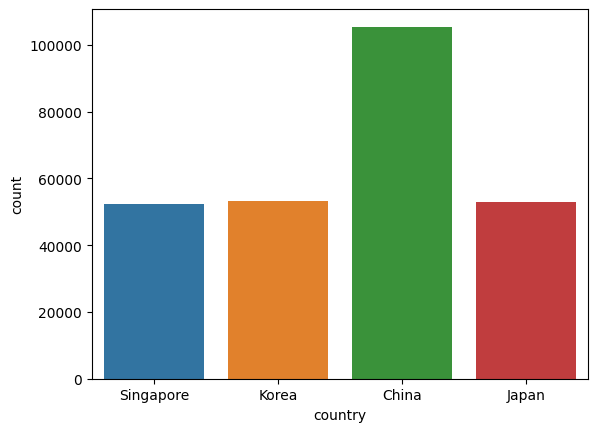

In [237]:
sns.countplot(data = df, x = 'country')

In [263]:
df3 = df.loc[df['country']=='Singapore', part1]

In [262]:
part1 = ['price ($)', 'weight (kg)']

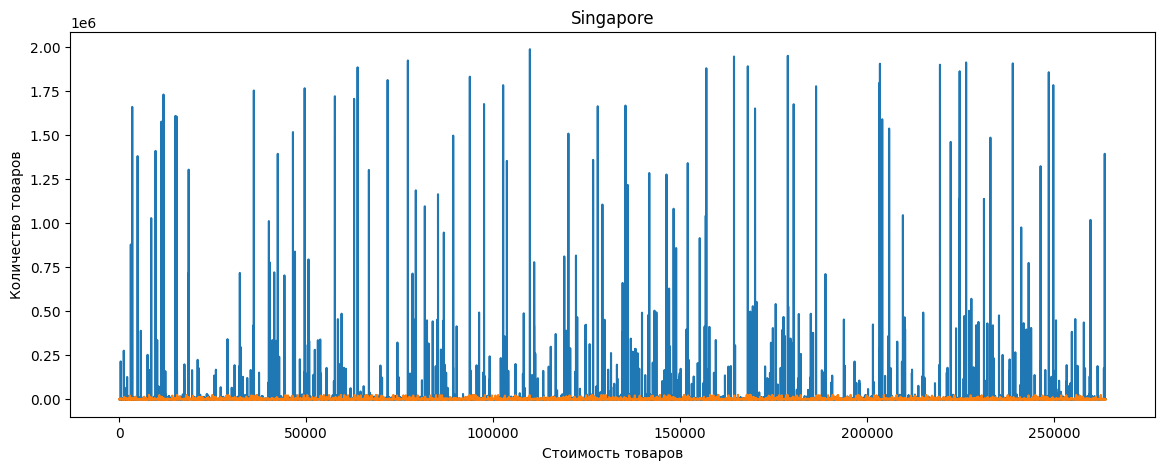

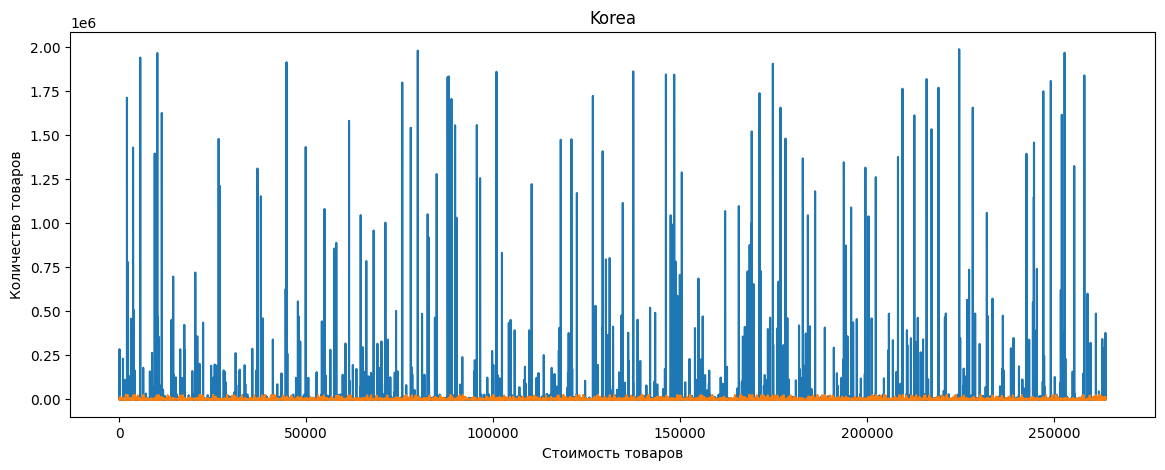

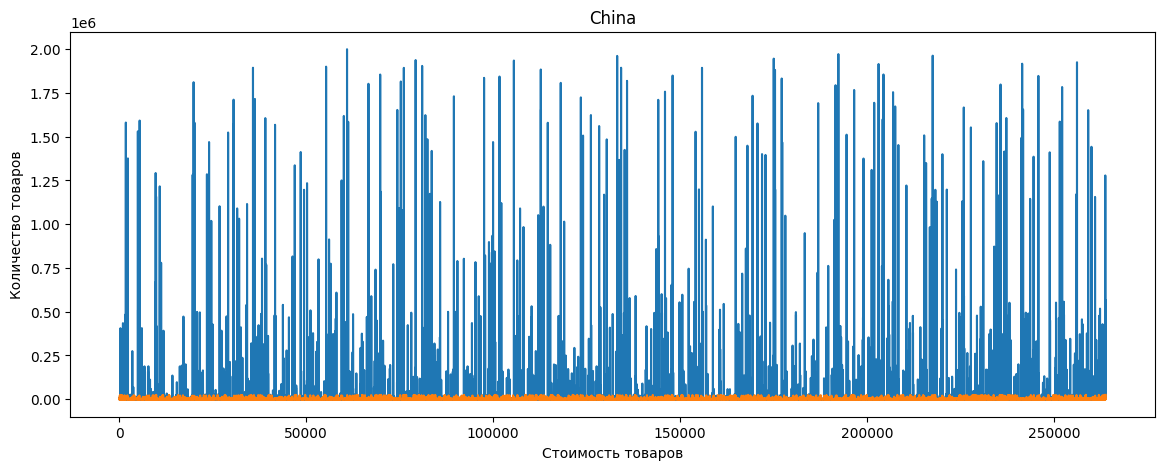

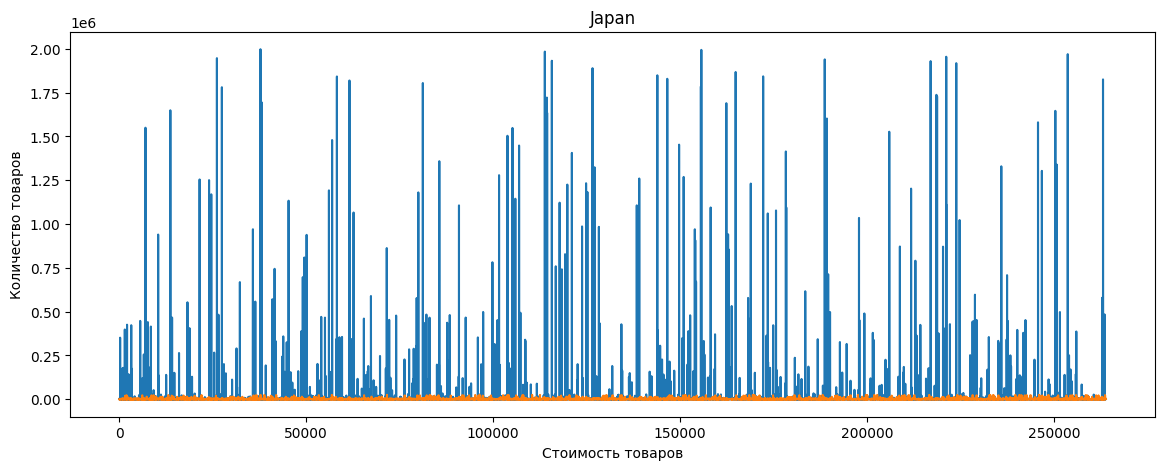

In [275]:
##
for x in df['country'].unique():
    plt.figure(figsize=(14, 5))
    plt.plot(df.loc[df['country']==x, part1])
    plt.xlabel('Стоимость товаров')
    plt.ylabel('Количество товаров')
    plt.title(x)
    plt.show()

In [287]:
part2 = ['shipment date', 'weight (kg)']

In [278]:
df.loc[df['country']==x, part2]

,shipment date
14,2023-03-20
15,2023-03-24
16,2023-03-17
22,2023-03-19
24,2023-03-26
...,...
263805,2023-03-16
263811,2023-03-17
263813,2023-03-14
263817,2023-03-15


In [283]:
df.loc[df['country']==x, 'shipment date'].value_counts()

2023-03-27    3555
2023-03-13    3174
2023-03-12    3173
2023-03-14    3120
2023-03-21    3101
2023-03-15    3087
2023-03-18    3081
2023-03-25    3080
2023-03-23    3079
2023-03-24    3071
2023-03-22    3029
2023-03-17    2988
2023-03-26    2981
2023-03-16    2973
2023-03-28    2971
2023-03-19    2971
2023-03-20    2964
Name: shipment date, dtype: int64

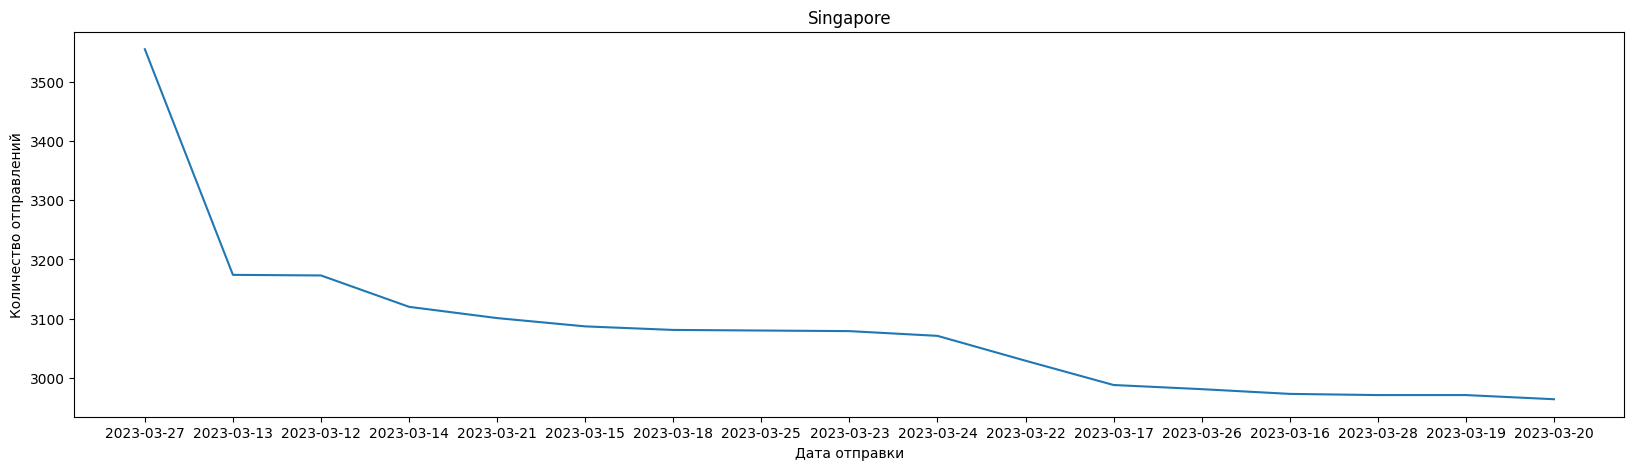

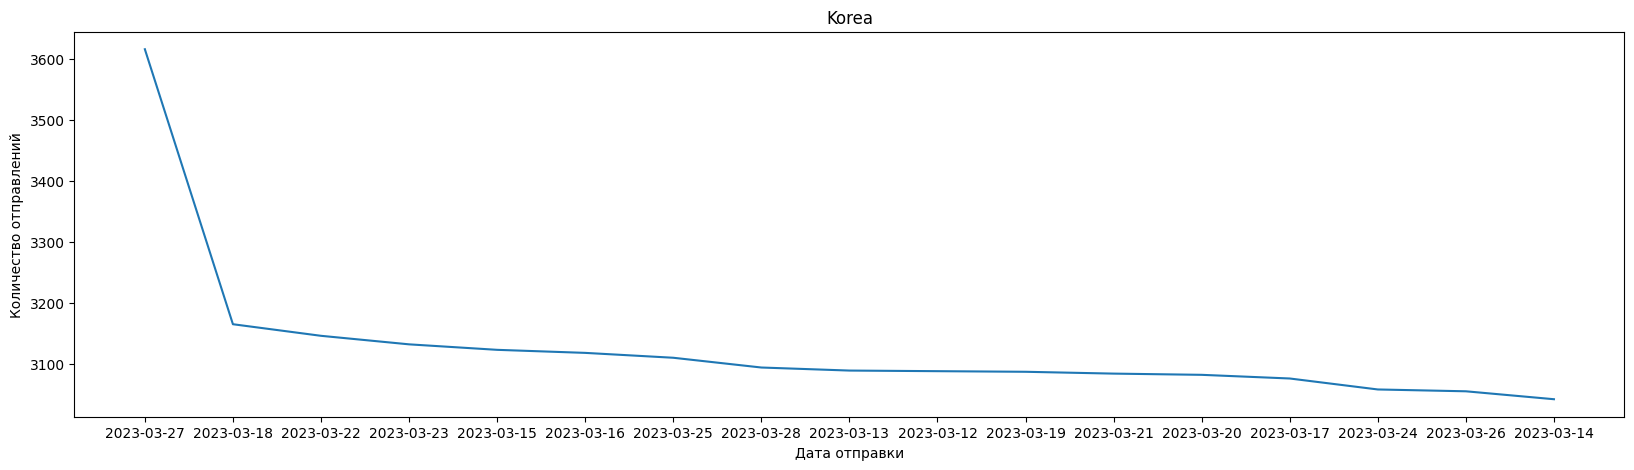

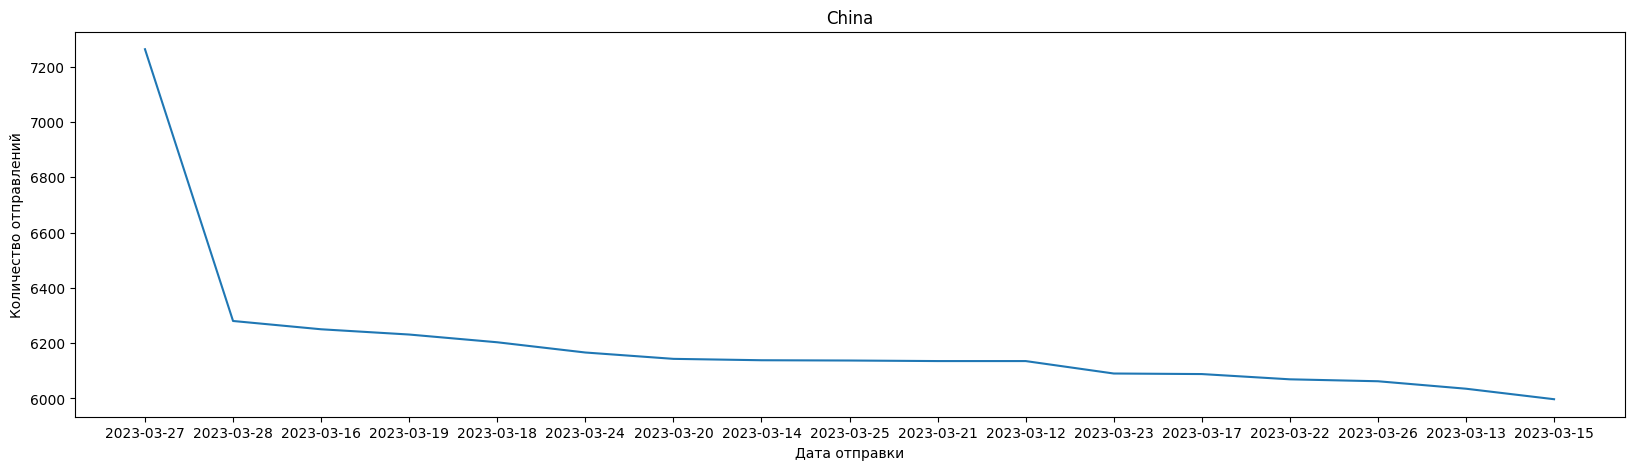

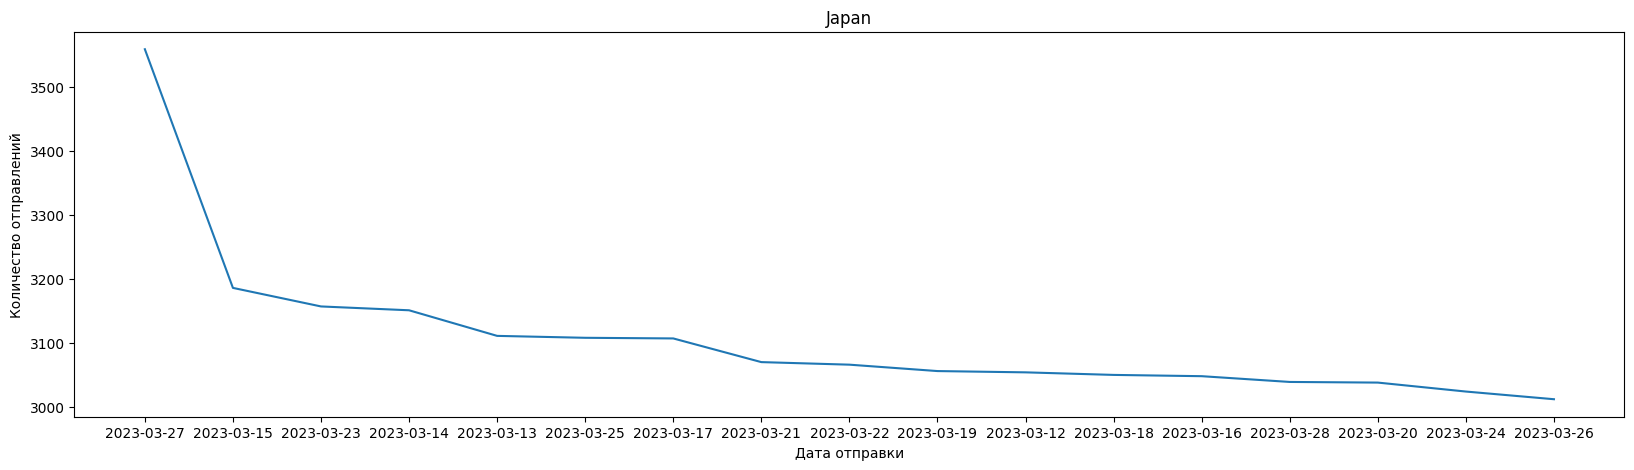

In [286]:
for x in df['country'].unique():
    plt.figure(figsize=(20, 5))
    plt.plot(df.loc[df['country']==x, 'shipment date'].value_counts())
    plt.xlabel('Дата отправки')
    plt.ylabel('Количество отправлений')
    plt.title(x)
    plt.show()

In [300]:
part2 = ['shipment date', 'weight (kg)']
df.loc[df['country']==x, part2].groupby('shipment date')['weight (kg)'].sum()

shipment date
2023-03-12    9.463122e+05
2023-03-13    8.431871e+05
2023-03-14    9.806536e+05
2023-03-15    9.442411e+05
2023-03-16    9.605050e+05
2023-03-17    9.270341e+05
2023-03-18    8.476965e+05
2023-03-19    8.585540e+05
2023-03-20    1.023499e+06
2023-03-21    1.094161e+06
2023-03-22    9.257315e+05
2023-03-23    9.505337e+05
2023-03-24    1.035259e+06
2023-03-25    1.074747e+06
2023-03-26    1.081826e+06
2023-03-27    1.196878e+06
2023-03-28    1.185181e+06
Name: weight (kg), dtype: float64

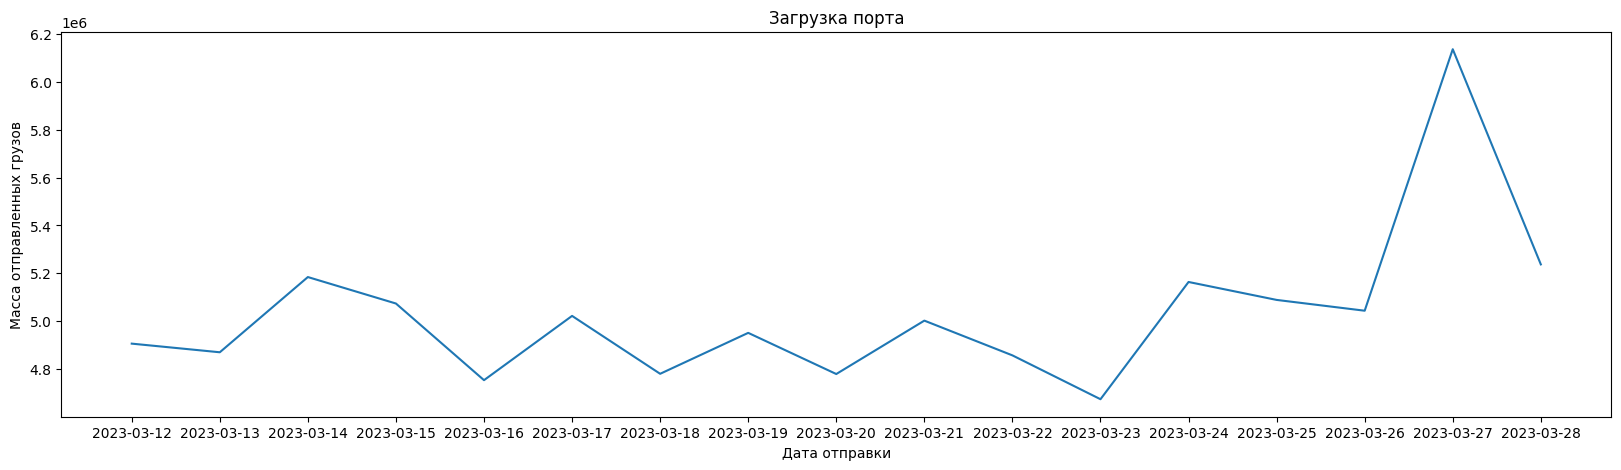

In [312]:
plt.figure(figsize=(20, 5))
plt.plot(df.groupby('shipment date')['weight (kg)'].sum())
plt.xlabel('Дата отправки')
plt.ylabel('Масса отправленных грузов')
plt.title('Загрузка порта')
plt.show()

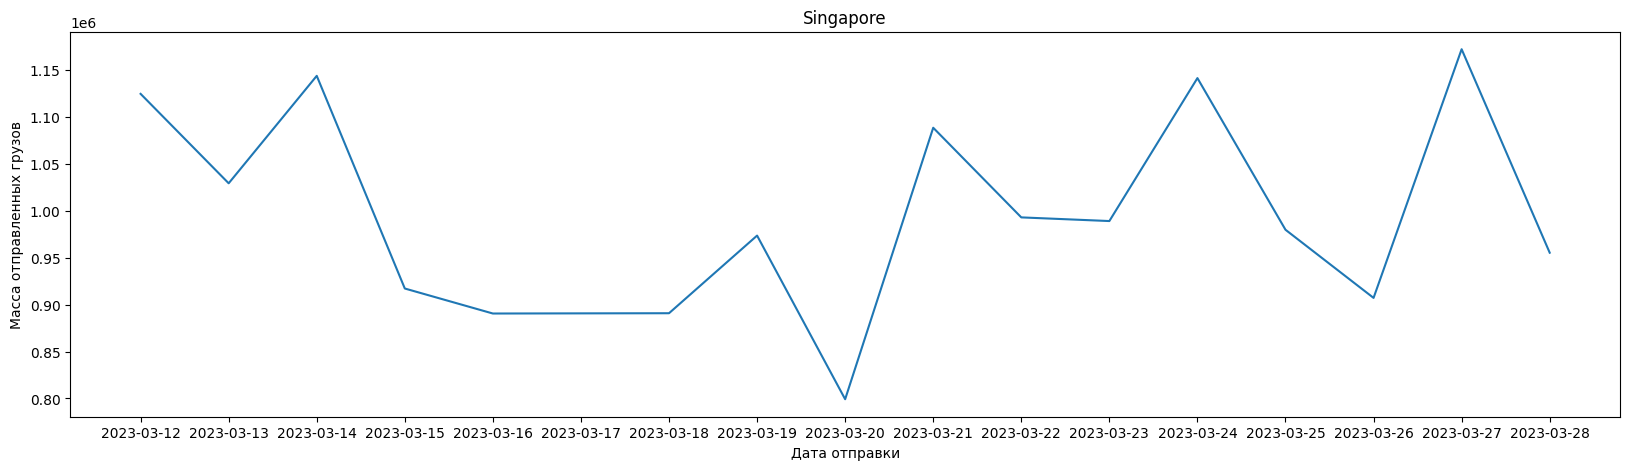

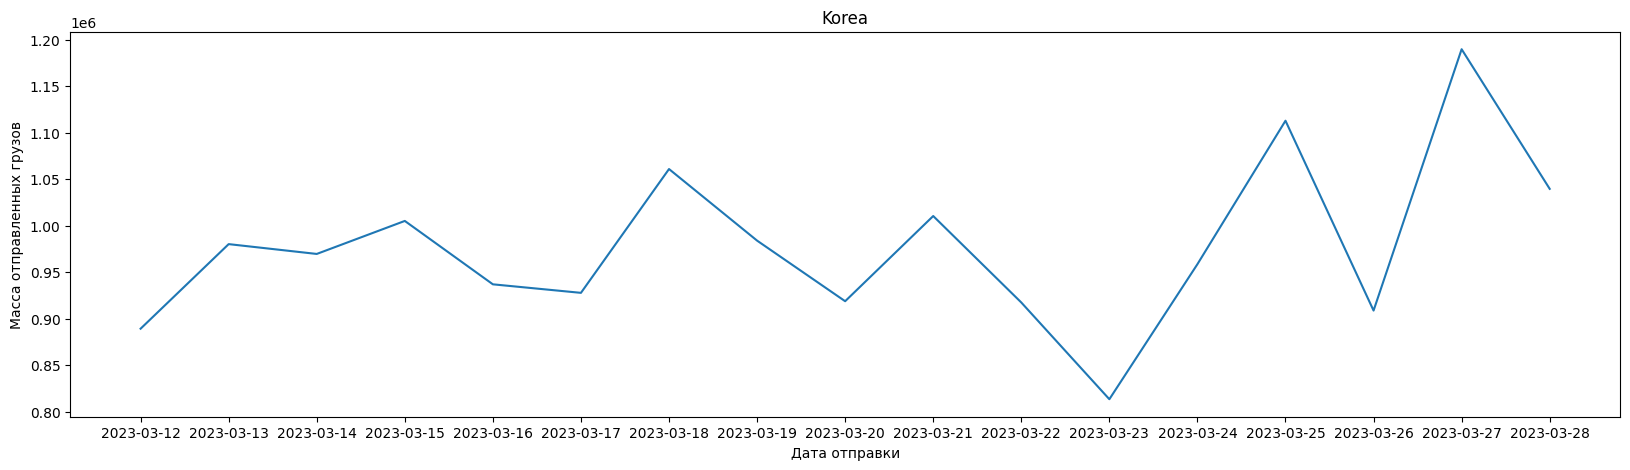

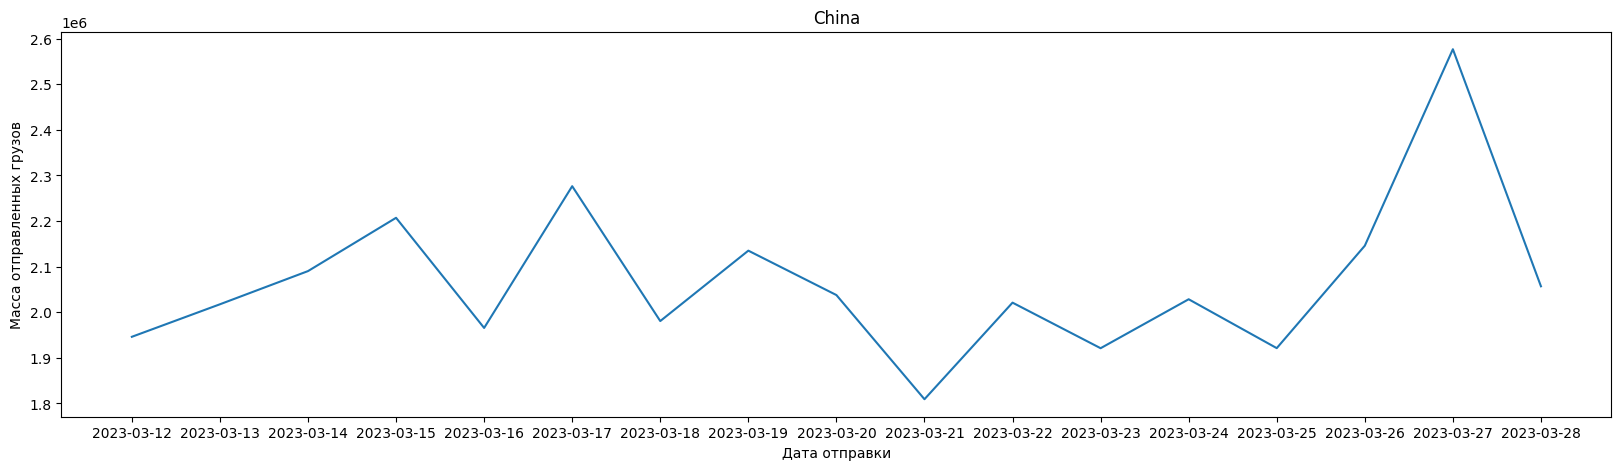

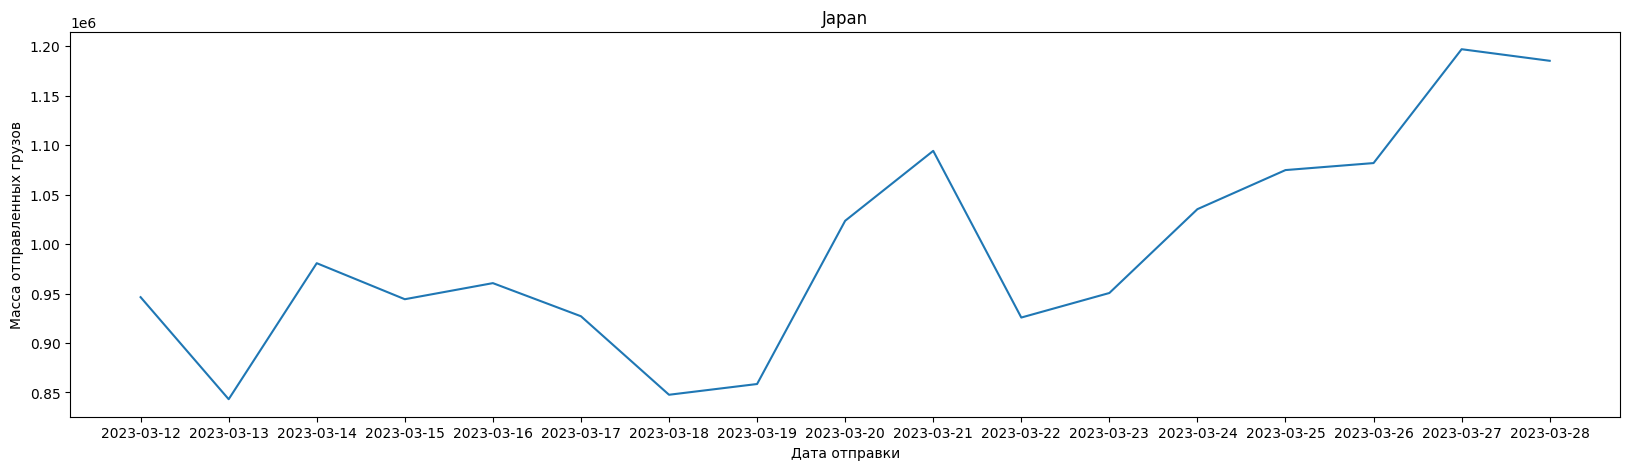

In [313]:
for x in df['country'].unique():
    plt.figure(figsize=(20, 5))
    plt.plot(df.loc[df['country']==x, part2].groupby('shipment date')['weight (kg)'].sum())
    plt.xlabel('Дата отправки')
    plt.ylabel('Масса отправленных грузов')
    plt.title(x)
    plt.show()